Random forests
---

In [1]:
from sklearn.datasets import make_circles

# Generate circle data set
X, y = make_circles(
    n_samples=200, shuffle=True, noise=0.3, random_state=0, factor=0.3)

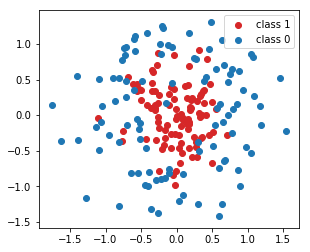

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# Same scale for x- and y-axis
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

# Plot data
class1_idx = (y == 1)
ax.scatter(X[:, 0][class1_idx], X[:, 1][class1_idx], c='C3', label='class 1')
ax.scatter(X[:, 0][~class1_idx], X[:, 1][~class1_idx], c='C0', label='class 0')
ax.legend()
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create a decision tree
dt = RandomForestClassifier(
    n_estimators=1, max_depth=5, random_state=0)

# Fit estimator
dt.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
import numpy as np

# Helper function
def decision_surface(ax, x1, x2, y, estimator):
    # Same scale for x- and y-axis
    ax.set_aspect('equal', adjustable='box')

    # Plot data points
    class1_idx = (y == 1)
    plt.scatter(x1[class1_idx], x2[class1_idx], color='C3', label='class 1')
    plt.scatter(x1[~class1_idx], x2[~class1_idx], color='C0', label='class 0')

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=500)
    y_values = np.linspace(*ylim, num=500)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.flatten(), yy.flatten()]

    # Compute predictions
    preds = estimator.predict(grid_points)
    zz = preds.reshape(xx.shape)

    # Draw decision boundary
    plt.contour(xx, yy, zz, levels=[0.5], colors='gray')
    
    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, alpha=0.1, cmap=plt.cm.coolwarm)
    plt.legend()
    plt.show()

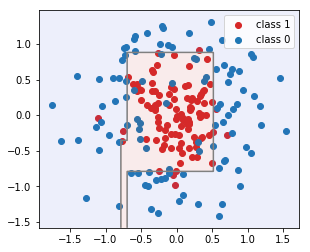

In [11]:
# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, dt)

It seems that a single decision tree with a depth of five is too simple to model our two circles (high bias). Let's try to remove the limit on its depth by setting ```max_depth=None```.

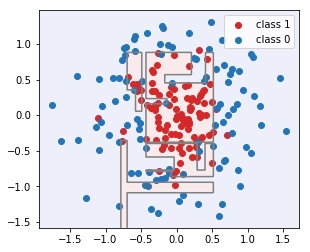

In [12]:
# Create a (deep) decision tree
dt_max_depth = RandomForestClassifier(
    n_estimators=1, max_depth=None, random_state=0)

# Fit estimator
dt_max_depth.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, dt_max_depth)

This time, the decision surface looks too complicated, and our decision tree is overfitting (high variance). The idea behind random forests is to reduce the variance of our decision tree by combining several instances of it. Let's start with an ensemble of ten decision trees.

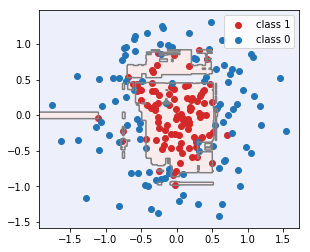

In [13]:
# Create random forest estimator
rf_10 = RandomForestClassifier(
    n_estimators=10, max_depth=None, random_state=0)

# Fit estimator
rf_10.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rf_10)

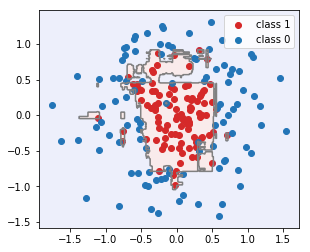

In [14]:
# Create a (large) random forest estimator
rf_200 = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=0)

# Fit estimator
rf_200.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rf_200)

In [15]:
from sklearn.model_selection import cross_validate

# Mean test score of a single decision tree (max depth)
dt_scores = cross_validate(dt_max_depth, X, y, cv=10)
print('Decision tree - mean test {:.3f}'.format(
    np.mean(dt_scores['test_score'])))
# Prints: 0.780

# Mean test score of a random forest (200x, max depth)
rf_scores = cross_validate(rf_200, X, y, cv=10)
print('Random forest - mean test {:.3f}'.format(
    np.mean(rf_scores['test_score'])))
# Prints: 0.825

Decision tree - mean test 0.780
Random forest - mean test 0.825


Algorithm behind random forests
---

```python
# Build each tree from the random forest
for tree in random forest:
    # Bagging
    X_subset = draw a random subset of data points

    # Build each split recursively
    for split in tree:
        # "Randomized feature selection"
        idxs = draw a random subset of features

        # For each feature: find best "split condition"
        for i in idxs:
            # Conditions of form: X_subset[i] < k
            split = Find k with minimum impurity

        # Split tree
        Use split with minimum impurity
```

# Note on multiclass vs. multilabel in Scikit-learn

In [16]:
from sklearn import datasets

# Load data set
iris = datasets.load_iris()

# Create X/y arrays
X = iris['data']
y = iris['target']

In [17]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=0)

We will now create two types of encodings for the labels 
y
, integer encoding and one-hot encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

# create one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)

y_tr_hot = encoder.fit_transform(y_tr.reshape(-1,1))
y_te_hot = encoder.transform(y_te.reshape(-1,1))

# integer encoded labels
print(y_tr[0]) # Prints: 1

# one-hot encoded labels
print(y_tr_hot[0]) # Prints: [0. 1. 0.]


1
[0. 1. 0.]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create the estimator
knn = KNeighborsClassifier(n_neighbors=2)

# Fit it to train data
knn.fit(X_tr, y_tr)

# output the classes
print(knn.classes_) # Prints: [0 1 2]

# Accuracy on test set
accuracy = knn.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy)) # Prints: 0.978

[0 1 2]
Accuracy: 0.978


In [20]:
# Create the estimator
knn = KNeighborsClassifier(n_neighbors=2)

# Fit it to train data (using one-hot encoded labels)
knn.fit(X_tr, y_tr_hot)

# output the classes
print(knn.classes_) # Prints: [array([0., 1.]), array([0., 1.]), array([0., 1.])]

# Accuracy on test set
accuracy = knn.score(X_te, y_te_hot)
print('Accuracy: {:.3f}'.format(accuracy)) # Prints: 0.956

[array([0., 1.]), array([0., 1.]), array([0., 1.])]
Accuracy: 0.956


You can notice the degradation in accuracy performance by 
2
%
. This is because the Scikit-learn model got confused by the one-hot encoding of 
y
 and performed multilabel classification (three independent binary classifications in this example) instead of a single multiclass classification. You can notice this by printing the ```classes_```
attribute as done above.

In [21]:
# Multi-class decision surface
def decision_surface(ax, x1, x2, y, estimator, colors=plt.cm.tab10.colors):
    # Same scale for x- and y-axis
    ax.set_aspect('equal', adjustable='box')

    # Plot data points
    for y_class, color in zip(np.unique(y), colors): # <-- Iterate over classes
        class_idx = (y == y_class)
        plt.scatter(x1[class_idx], x2[class_idx], label='class {}'.format(y_class), zorder=2, color=color)

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=500)
    y_values = np.linspace(*ylim, num=500)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.flatten(), yy.flatten()]

    # Compute predictions
    preds = estimator.predict(grid_points)
    zz = preds.reshape(xx.shape)

    # Draw decision boundary
    levels = [min(y) - 0.5] + [x + 0.5 for x in sorted(np.unique(y))] # <-- Adapt levels
    plt.contour(xx, yy, zz, levels=levels, colors='gray', zorder=1)

    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, levels=levels, alpha=0.3, colors=colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Training score: 1.00


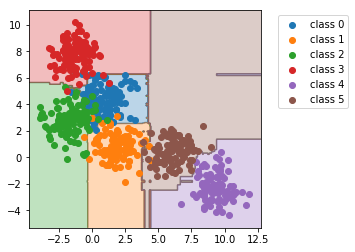

In [22]:
import sklearn.datasets as datasets

# Generate data set with 6 blobs of 100 points each
X, y = datasets.make_blobs(n_samples=(100, 100, 100, 100, 100, 100), random_state=0)

# Train a random forest
sample_rf = RandomForestClassifier(n_estimators=20)
sample_rf.fit(X, y)
print('Training score: {:.2f}'.format(sample_rf.score(X, y)))

# Plot decision surface
fig = plt.figure()
decision_surface(fig.gca(), X[:, 0], X[:, 1], y, sample_rf)